In [4]:
# -*- coding: utf-8 -*-
from pips import *
from flask import Markup
from IPython.core.display import display, HTML


''
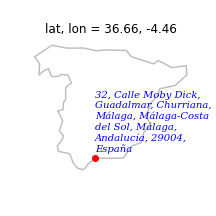

In [5]:
mapa_ubicacion(lat,lon)

# Ubicacion inclinacin orientacion


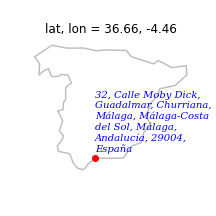

In [6]:
# 
lat,lon=36.664187, -4.458605    
# lat,lon=36.66433, -4.455    

display(HTML(Markup(f'<center><img src={mapa_ubicacion(lat,lon)}></center>')))

In [3]:
# 

from flask import Markup
from IPython.core.display import display, HTML
url=foto_satelite(lat,lon)
display(HTML(Markup(f'<center><img src={url}></center>')))


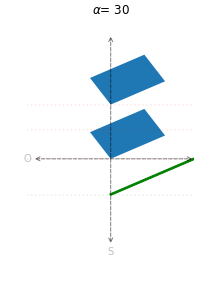

In [4]:
# 


lat=38
lon=-3
my=100
mx=150
inclinacion=20
orientacion=30
muro_sur=50
paneles_planta(lat,lon,inclinacion,orientacion,mx,my,muro_sur)
display(HTML(Markup(f'<center><img src={paneles_planta(lat,lon,inclinacion,orientacion,mx,my,muro_sur)}></center>')))


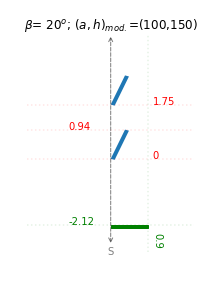

In [5]:
#
lat=38
lon=-3
my=100
mx=150
inclinacion=20
orientacion=-30
muro_sur=90
display(HTML(Markup(f'<center><img src={paneles_lateral(lat,lon,inclinacion,orientacion,mx,my,muro_sur)}></center>')))





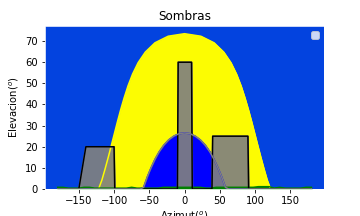

In [6]:
# 

lat=40
lon=-3
sombra=[ (-150, 0), (-100, 20), (-140, 20),(-10,0),(-9,60),(10,60),(11,0),(-99, 0), ]
sombra=[ (10,60),(11,0),(-99, 0), ]
sombra=[ (-150, 0), (-100, 20), (-140, 20),(-10,0),(-9,60),(10,60),(11,0), (39, 0),(40, 25),(90, 25),(91, 0),(-99, 0), ]

fig, horizonte=sombras(lat,lon,sombra)
display(HTML(Markup(f'<center><img src={fig}></center>')))



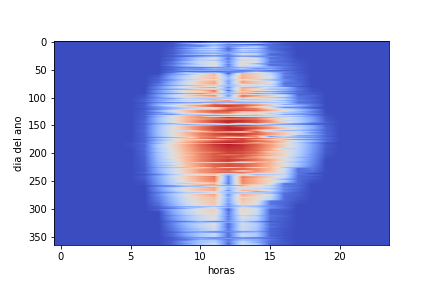

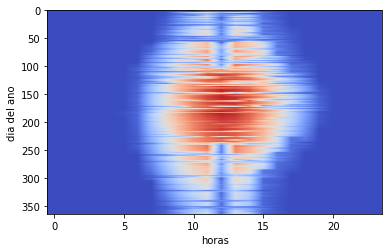

In [10]:
fig,FS,tmy=sombras_perdidas(lat,lon,horizonte)
display(HTML(Markup(f'<center><img src={fig}></center>')))

## demanda


In [ ]:
demand=libro['carga']['v']
# demand=demand(   squeeze=True)
# demand['carga']
demand.Name=0
demand.header=None
demand.parse_dates=True
demand.squeeze=True

In [ ]:
demand = pd.read_csv('_carga.csv', index_col=0, header=None, parse_dates=True, squeeze=True)
pv_1kW = pd.read_csv('_fv.csv', index_col=0, header=None, parse_dates=True, squeeze=True)
demand=demand/1000
pv_1kW=pv_1kW/1000*0.7*0.2


In [ ]:

# demand=demand*365

pv_size = 1

param_tech = {'BatteryCapacity': 1500*24/1000,
              'BatteryEfficiency': .9,
              'InverterEfficiency': .85,
              'timestep': 1,
              'MaxPower': 2.56
             }

pv = pv_1kW * pv_size

E1 = dispatch_max_sc(pv, demand, param_tech, return_series=False)

E=E1
week=50
sliced_index = (pv.index.isocalendar().week==week)
pv_sliced = pv[sliced_index]
demand_sliced = demand[sliced_index]
self_consumption = E['inv2load'][sliced_index]
res_pv_sliced = E['res_pv'][sliced_index]
grid2load_sliced = E['grid2load'][sliced_index]
store2inv_sliced = E['store2inv'][sliced_index]
LevelOfCharge = E['LevelOfCharge'][sliced_index]
inv2grid = E['inv2grid'][sliced_index]
grid2load = E['grid2load'][sliced_index]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(17, 4))

#fig, ax = plt.subplots(figsize=(17, 4))
# axes.plot(demand_sliced.index, demand_sliced)
axes.fill_between(self_consumption.index, 0, self_consumption, color='orange', alpha=.2)
axes.fill_between(res_pv_sliced.index, self_consumption, pv_sliced , color='yellow', alpha=.2)
axes.fill_between(store2inv_sliced.index,         pv_sliced,         store2inv_sliced + pv_sliced, color='green',alpha=.3)
axes.fill_between(grid2load_sliced.index,         pv_sliced + store2inv_sliced,         grid2load_sliced + pv_sliced + store2inv_sliced, color='grey', alpha=.2)
# axes.plot(grid2load_sliced.index, grid2load_sliced, color='red', ls=":", lw=1)
# axes.set_ylim([0, axes[0].get_ylim()[1] ])
axes.set_ylabel('Potencia (kW)');

